# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 24,548 vaults in the database and 13,609,128 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 2,993,523 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   
2024-01-11 10:13:15  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169333121   
2024-01-11 11:13:20  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169347521   
2024-01-11 12:13:25  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169361921   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   
2024-01-11 10:13:15         1.00          1.00          1.00              NaN   
2024-01-11 11:13:20         1.00          1.00          1.00              NaN   
2024-01-11 12:13:25         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6435   
2024-01-11 10:13:15             NaN         Staked USDA (Arbitrum) #6435   
2024-01-11 11:13:20             NaN         Staked USDA (Arbitrum) #6435   
2024-01-11 12:13:25             NaN         Staked USDA (Arbitrum) #6435   

                     event_count            protocol  raw_share_price  \
timestamp                                                               
2024-01-11 09:13:06       127268  <unknown ERC-4626>             1.00   
2024-01-11 10:13:15       127268  <unknown ERC-4626>             1.00   
2024-01-11 11:13:20       127268  <unknown ERC-4626>             1.00   
2024-01-11 12:13:25       127268  <unknown ERC-4626>             1.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2024-01-11 09:13:06        0.00                 1.00                   0.02   
2024-01-11 10:13:15        0.00                 1.00                   0.02   
2024-01-11 11:13:20        0.00                 1.00                   0.02   
2024-01-11 12:13:25        0.00                 1.00                   0.02   

                     tvl_filtering_mask  
timestamp                                
2024-01-11 09:13:06                True  
2024-01-11 10:13:15                True  
2024-01-11 11:13:20                True  
2024-01-11 12:13:25                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 289 vaults out of total of 5,681 vaults on chain Arbitrum, having 725,666 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                                 <unknown ERC-4626>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               0.00
10         Withdraw fee                                               0.00
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14              Lock up                                               None
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/127 [00:00<?, ?it/s]

Cleaning metrics for 127 vaults
Vault entries with too high NAV values filtered out: 1
Vault entries with too small ATH NAV values filtered out: 7
Vaults abnormally high returns: 3
Vault entries with too few deposit and redeem events (min 25) filtered out: 13
Calculated lifetime metrics for 102 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  \
86  Silo Finance Borrowable USDC Deposit, SiloId: 146             0.04   
44                                 Plutus Hedge Token             0.16   

    lifetime_return_net  cagr  cagr_net  three_months_returns  \
86                  NaN  0.23       NaN                  0.04   
44                 0.14  0.21      0.18                  0.05   

    three_months_returns_net  three_months_cagr  three_months_cagr_net  \
86                       NaN               0.23                    NaN   
44                      0.04               0.21                   0.18   

    three_months_sharpe  three_months_sharpe_net  three_months_volatility  \
86                10.52                    10.52                     0.02   
44                 2.77                     2.77                     0.07   

    one_month_returns  one_month_returns_net  one_month_cagr  \
86               0.03                    NaN            0.41   
44               0.02                   0.02            0.25   

    one_month_cagr_net denomination share_token     chain      peak_nav  \
86                 NaN         USDC   bUSDC-146  Arbitrum 16,563,230.78   
44                0.22         USDC    plvHedge  Arbitrum    260,513.81   

     current_nav  years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
86 15,283,869.03   0.18       NaN       NaN         0.00          0.00   
44    213,268.94   0.78      0.00      0.12         0.00          0.00   

   fee_label lockup  event_count            protocol  \
86     ? / ?    NaT        15433  <unknown ERC-4626>   
44  0% / 12%    NaT           78              Plutus   

                         risk  risk_numeric  \
86                       None           NaN   
44  VaultTechnicalRisk.severe         40.00   

                                                  id          start_date  \
86  42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9 2025-09-04 18:15:00   
44  42161-0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a 2025-01-29 16:59:55   

              end_date                                     address  chain_id  \
86 2025-11-11 00:27:03  0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9     42161   
44 2025-11-11 00:27:03  0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a     42161   

    stablecoinish     last_updated_at  last_updated_block       features  
86           True 2025-11-11 00:27:03           398955521             []  
44           True 2025-11-11 00:27:03           398955521  [plutus_like]

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 98 vaults.
Last update 2025-11-11 00:27:03
Formatted data for 97 vaults.
Top 97 vaults by 1 month annualised return are: Silo Finance Borrowable USDC Deposit, SiloId: 146, Plutus Hedge Token, Curve Vault for crvUSD, LazyVault_LowerRisk_USDC, Gains Network USDC, Silo Finance Borrowable USDC Deposit in ARB Silo, Harvest: USDC Vault (0x2d5F), HYPE++, gmUSDC, Silo Finance Borrowable USDC Deposit, SiloId: 151, Concrete USDC MultiSig Strategy, Staked USDai, USDC-2 yVault, Silo Finance Borrowable USDC Deposit, SiloId: 145, Clearstar High Yield USDC, MEV Capital USDC, Nashpoint DeFi & RWA Fund, autoSUSDai, Clearstar USDC Reactor, Gains Network DAI, Curve Vault for crvUSD, Hyperithm USDC, Tokemak arbUSD, USDn2, Yield Chasing Silo USDC, K3 Capital USDai USDC, Yield Chasing crvUSD, Yield Chasing USDC, Peapods Interest Bearing USDC - 22, Yearn Degen USDC, Saving USX, Euler Earn USDC, Dolomite: USDC, Gauntlet USDC Core, Euler Arbitrum USDC, Dolomite:

Name  \
#                                                       
1   Silo Finance Borrowable USDC Deposit, SiloId: 146   
2                                  Plutus Hedge Token   
3                              Curve Vault for crvUSD   
4                            LazyVault_LowerRisk_USDC   
5                                  Gains Network USDC   
6    Silo Finance Borrowable USDC Deposit in ARB Silo   
7                        Harvest: USDC Vault (0x2d5F)   
8                                              HYPE++   
9                                              gmUSDC   
10  Silo Finance Borrowable USDC Deposit, SiloId: 151   
11                    Concrete USDC MultiSig Strategy   
12                                       Staked USDai   
13                                      USDC-2 yVault   
14  Silo Finance Borrowable USDC Deposit, SiloId: 145   
15                          Clearstar High Yield USDC   
16                                   MEV Capital USDC   
17                          Nashpoint DeFi & RWA Fund   
18                                         autoSUSDai   
19                             Clearstar USDC Reactor   
20                                  Gains Network DAI   
21                             Curve Vault for crvUSD   
22                                     Hyperithm USDC   
23                                     Tokemak arbUSD   
24                                              USDn2   
25                            Yield Chasing Silo USDC   
26                              K3 Capital USDai USDC   
27                               Yield Chasing crvUSD   
28                                 Yield Chasing USDC   
29                 Peapods Interest Bearing USDC - 22   
30                                   Yearn Degen USDC   
31                                         Saving USX   
32                                    Euler Earn USDC   
33                                     Dolomite: USDC   
34                                 Gauntlet USDC Core   
35                                Euler Arbitrum USDC   
36                                     Dolomite: USDT   
37                                   Prime Tether USD   
38                          Euler Arbitrum Yield USDC   
39                         Steakhouse High Yield USDC   
40                                 Frontier Theo USDC   
41                             K3 Capital USDai USDT0   
42                                        Staked USDX   
43                                   Spark USDC Vault   
44                             Curve Vault for crvUSD   
45                              Steakhouse Prime USDC   
46                               DAMM Stablecoin Fund   
47                          Static Aave Arbitrum USDT   
48                         Wrapped Aave Arbitrum USDT   
49                                    Fluid Gho Token   
50                                        dForce USDC   
51                                Gauntlet USDC Prime   
52                        Wrapped Aave Arbitrum USDCn   
53                         Static Aave Arbitrum USDCn   
54                                     Fluid USD Coin   
55               Crypto.com Defi Wallet Compound USDC   
56                          Wrapped Aave Arbitrum GHO   
57                   Crypto.com Defi Wallet AAVE USDT   
58                           LazyVault_LowerRisk_USDT   
59                 Peapods Interest Bearing USDC - 25   
60                   Crypto.com Defi Wallet AAVE USDC   
61                    Concrete USDC MultiSig Strategy   
62                         fija Strategy USDC AaveOpt   
63                                   Fluid Tether USD   
64                                        Staked EURA   
65                             Curve Vault for crvUSD   
66                                          autoUSDai   
67                             Curve Vault for crvUSD   
68                             Curve Vault for crvUSD   
69                  Peapods Interest Bearing USDC - 6   
70

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x1dc45c4451a99882fda13c98de8c940961875a92: Silo Finance Borrowable USDC Deposit, SiloId: 151 due to missing fee data
Skipping vault 42161-0x4785df09013c1c492504fb4688ed3f320c964c9c: Concrete USDC MultiSig Strategy due to missing fee data
Skipping vault 42161-0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58: LazyVault_LowerRisk_USDC due to missing fee data
Skipping vault 42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9: Silo Finance Borrowable USDC Deposit, SiloId: 146 due to missing fee data
Skipping vault 42161-0xdc1ab820c92735e7a5e48f10fa3d8424ec47a93e: Silo Finance Borrowable USDC Deposit, SiloId: 145 due to missing fee data
Skipping vault 42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d: Curve Vault for crvUSD due to missing fee data


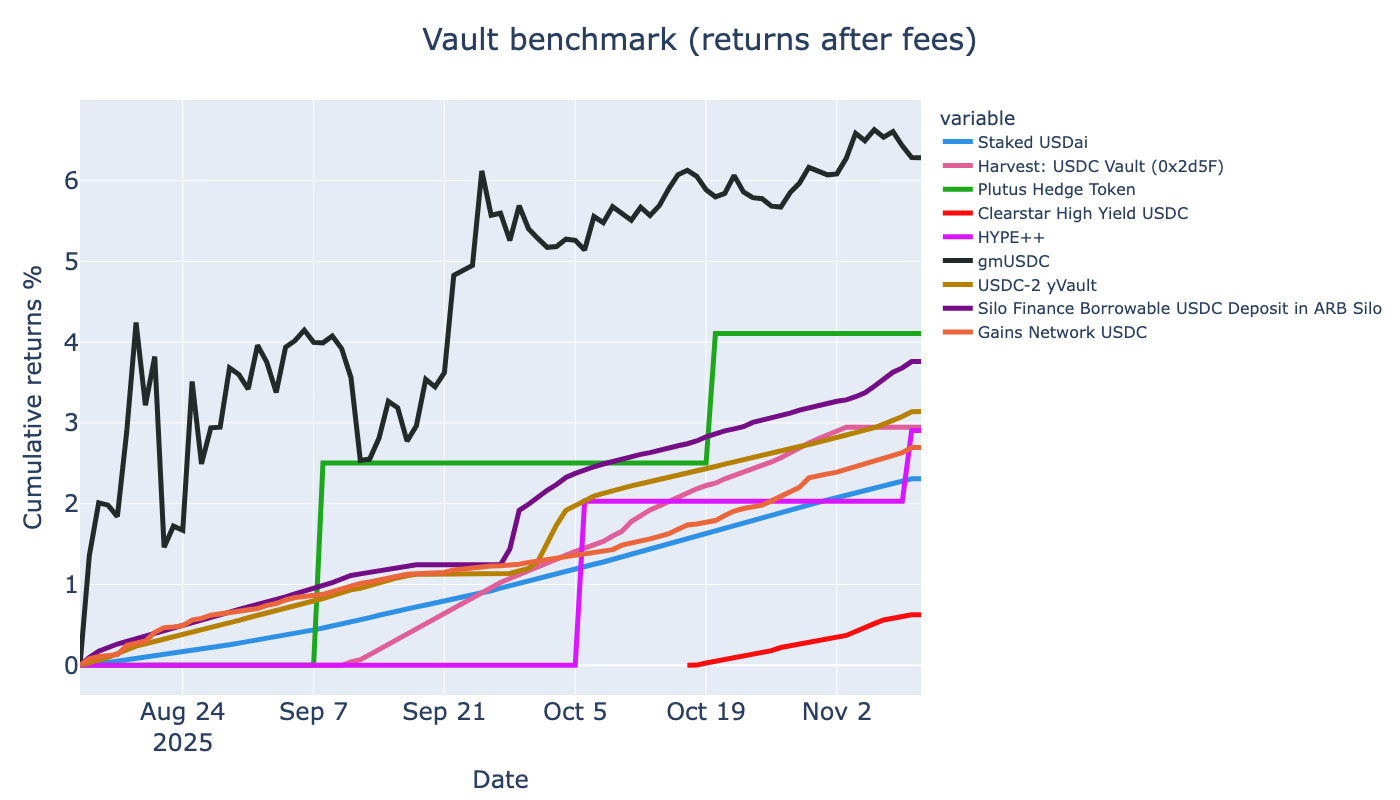

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

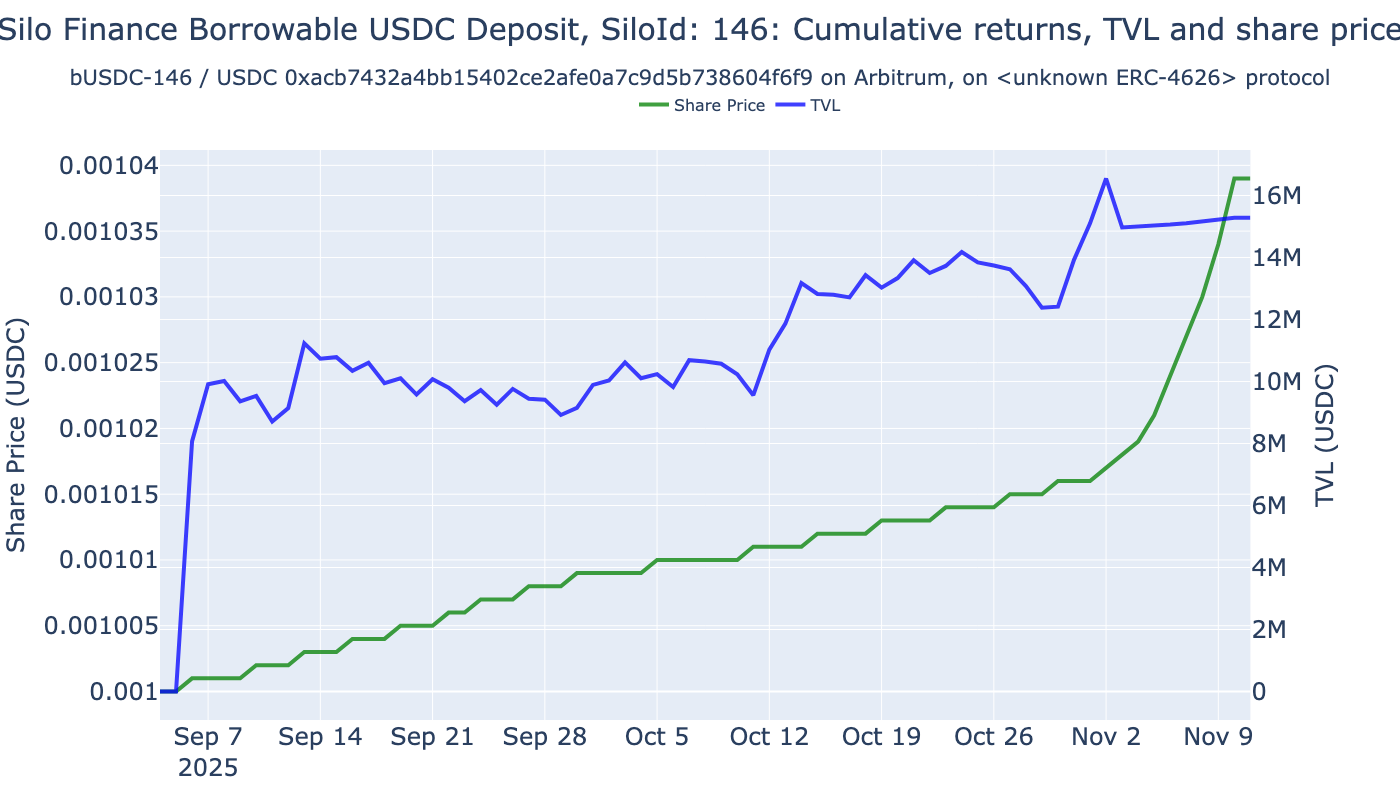

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

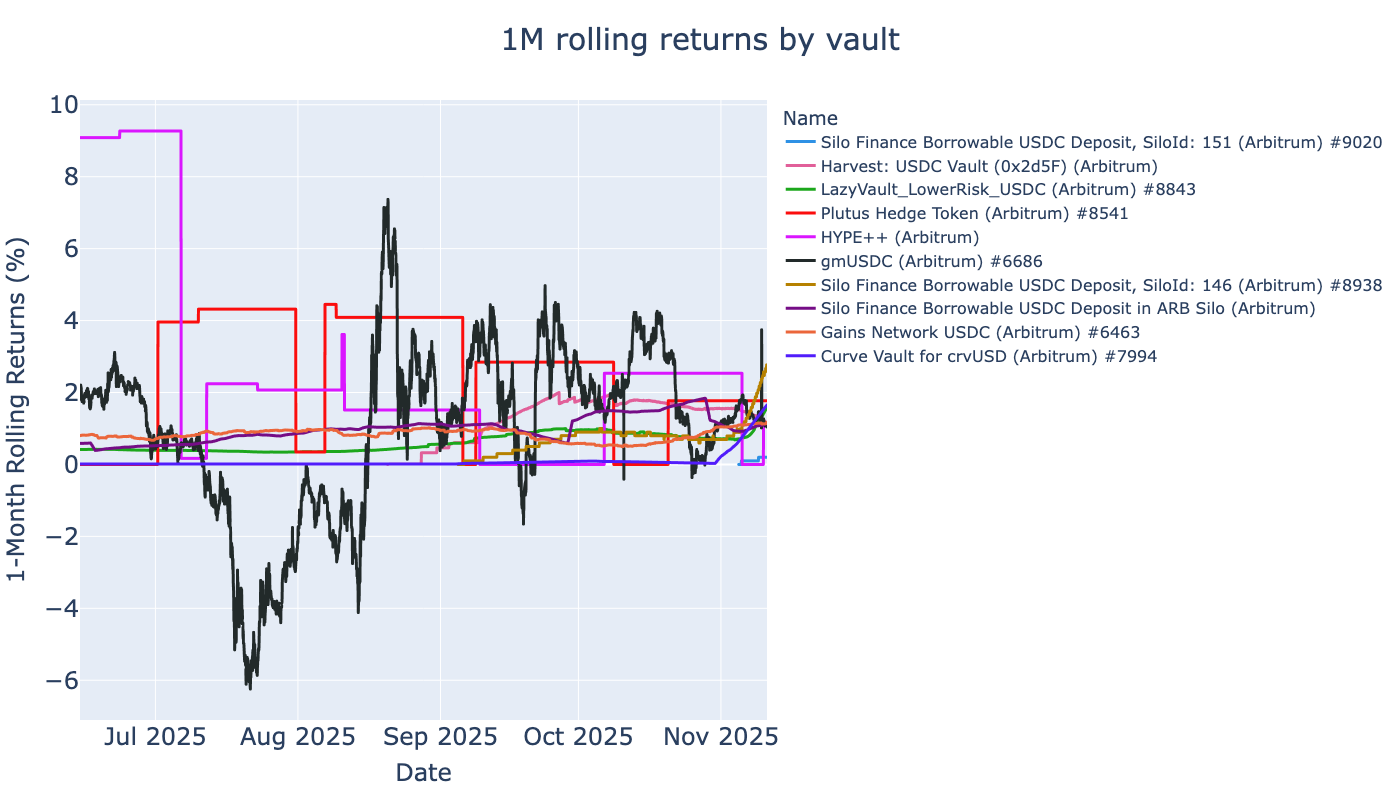

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                       
1   Silo Finance Borrowable USDC Deposit, SiloId: 146   
2                                  Plutus Hedge Token   
3                              Curve Vault for crvUSD   
4                            LazyVault_LowerRisk_USDC   
5                                  Gains Network USDC   
6    Silo Finance Borrowable USDC Deposit in ARB Silo   
7                        Harvest: USDC Vault (0x2d5F)   
8                                              HYPE++   
9                                              gmUSDC   
10  Silo Finance Borrowable USDC Deposit, SiloId: 151   
11                    Concrete USDC MultiSig Strategy   
12                                       Staked USDai   
13                                      USDC-2 yVault   
14  Silo Finance Borrowable USDC Deposit, SiloId: 145   
15                          Clearstar High Yield USDC   
16                                   MEV Capital USDC   
17                          Nashpoint DeFi & RWA Fund   
18                                         autoSUSDai   
19                             Clearstar USDC Reactor   
20                                  Gains Network DAI   
21                             Curve Vault for crvUSD   
22                                     Hyperithm USDC   
23                                     Tokemak arbUSD   
24                                              USDn2   
25                            Yield Chasing Silo USDC   
26                              K3 Capital USDai USDC   
27                               Yield Chasing crvUSD   
28                                 Yield Chasing USDC   
29                 Peapods Interest Bearing USDC - 22   
30                                   Yearn Degen USDC   
31                                         Saving USX   
32                                    Euler Earn USDC   
33                                     Dolomite: USDC   
34                                 Gauntlet USDC Core   
35                                Euler Arbitrum USDC   
36                                     Dolomite: USDT   
37                                   Prime Tether USD   
38                          Euler Arbitrum Yield USDC   
39                         Steakhouse High Yield USDC   
40                                 Frontier Theo USDC   
41                             K3 Capital USDai USDT0   
42                                        Staked USDX   
43                                   Spark USDC Vault   
44                             Curve Vault for crvUSD   
45                              Steakhouse Prime USDC   
46                               DAMM Stablecoin Fund   
47                          Static Aave Arbitrum USDT   
48                         Wrapped Aave Arbitrum USDT   
49                                    Fluid Gho Token   
50                                        dForce USDC   
51                                Gauntlet USDC Prime   
52                        Wrapped Aave Arbitrum USDCn   
53                         Static Aave Arbitrum USDCn   
54                                     Fluid USD Coin   
55               Crypto.com Defi Wallet Compound USDC   
56                          Wrapped Aave Arbitrum GHO   
57                   Crypto.com Defi Wallet AAVE USDT   
58                           LazyVault_LowerRisk_USDT   
59                 Peapods Interest Bearing USDC - 25   
60                   Crypto.com Defi Wallet AAVE USDC   
61                    Concrete USDC MultiSig Strategy   
62                         fija Strategy USDC AaveOpt   
63                                   Fluid Tether USD   
64                                        Staked EURA   
65                             Curve Vault for crvUSD   
66                                          autoUSDai   
67                             Curve Vault for crvUSD   
68                             Curve Vault for crvUSD   
69                  Peapods Interest Bearing USDC - 6   
70